Был проведен A/B тест, в котором группе B выдавалось персональное предложение в приложении Лента. Результаты A/B теста следующие:
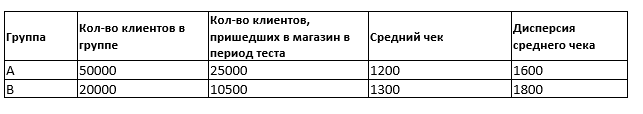
Задание:
• Какие условия необходимо проверить для корректного сравнения групп.

• Какие можно сделать выводы.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as sp

plt.style.use('dark_background')

СДелаем это в питоне

In [6]:
# assign values to lists  
data = [{'group': "A", 'sample_size': 50000, "events":2500, "aov":1200, "var":1600, "conv": 0.500}, 
        {'group': "B", 'sample_size': 20000, "events":10500, "aov":1300, "var":1800, "conv": 0.525}]
# Lists of dictionaries and row index.  
df = pd.DataFrame(data, index =['0', '1'])  

In [7]:
df

,group,sample_size,events,aov,var,conv
0,A,50000,2500,1200,1600,0.500
1,B,20000,10500,1300,1800,0.525


In [40]:
def two_histograms(x, y, bins):
    #Веса гистограммы
    x.hist(alpha=0.5, weights= [1./len(x)]*len(x), bins = bins)
    y.hist(alpha=0.5, weights= [1./len(y)]*len(y), bins = bins)
    
    #Добавляем вертикальную линию по осям пунктирная линия
    plt.axvline(x.mean(), color ="red", alpha = 0.8, linestyle= "dashed")
    plt.axvline(y.mean(), color ="blue", alpha = 0.8, linestyle= "dashed")
    
    #Легенда
    plt.legend([x.name, y.name])

In [59]:
import scipy as sp

In [60]:
x = pd.Series(sp.stats.norm.rvs(loc=1200, scale=1600**(1/2), size=2500))
y = pd.Series(sp.stats.norm.rvs(loc=1300, scale=1800**(1/2), size=10500))
x.name, y.name = 'A', 'B'

In [61]:
1600**(1/2)

40.0

In [62]:
1800**(1/2)

42.42640687119285

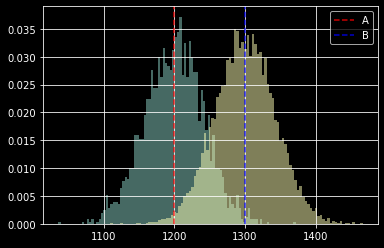

In [63]:
two_histograms(x,y,100)

Задача 3
В компании запустилась новая акция на постоянную дополнительную скидку X% ко всему чеку за выполнение определенных условий. Большая часть клиентов получила дополнительную скидку одномоментно в первый месяц акции, остальные клиенты добавлялись постепенно в течение года. Также каждый месяц часть клиентов прекращала совершать покупки в сети. Все клиенты имеют достаточно длинный профиль потребления на предпериоде (до получения доп. скидки). Необходимо оценить эффективность запущенной акции за год с разбивкой по месяцам.
Опишите, как бы вы строили подход к оценке эффекта, какие вы видите сложности при использовании того или иного подхода?
